#Importando o que importa

In [ ]:
!pip install teocomp -q
from teocomp.mt import MT
from teocomp.mt_ndmf import MTNDMF, S_BLK_BOX, S_BLK, S_BLK_U
from teocomp.mt_nd import MTND
from teocomp.mt_mf import MTMF

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.1 MB/s eta 0:00:00


## 1)  Construa uma Máquina de Turing de duas fitas para cada uma das linguagens abaixo. Suponha que $\Sigma=\{a,b,c\}$ e que a entrada esteja inicialmente toda na fita $1$.

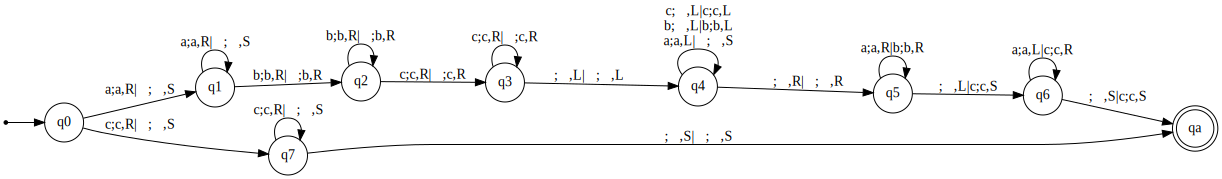

In [ ]:
#@title L_1 = $\{a^nb^nc^m \mid m,n \in \mathbb{N} \textit{ e } m > n \}$
Q = {'q0','q1','q2','q3','q4','q5','q6','q7','qa'}
Sigma = {'a','b','c'}
Gamma = {'a','b','c','*'}
q0 = 'q0'
blank='*' #=' '
F = {'qa'}
delta ={
         ('q0','a','*') : ('q1','a','*','R','S'),
         ('q0','c','*') : ('q7','c','*','R','S'),
         ('q1','a','*') : ('q1','a','*','R','S'),
         ('q1','b','*') : ('q2','b','b','R','R'),
         ('q2','b','*') : ('q2','b','b','R','R'),
         ('q2','c','*') : ('q3','c','c','R','R'),
         ('q3','c','*') : ('q3','c','c','R','R'),
         ('q3','*','*') : ('q4','*','*','L','L'),
         ('q4','c','c') : ('q4','*','c','L','L'),
         ('q4','b','b') : ('q4','*','b','L','L'),
         ('q4','a','*') : ('q4','a','*','L','S'),
         ('q4','*','*') : ('q5','*','*','R','R'),
         ('q5','a','b') : ('q5','a','b','R','R'),
         ('q5','*','c') : ('q6','*','c','L','S'),
         ('q6','a','c') : ('q6','a','c','L','R'),
         ('q6','*','c') : ('qa','*','c','S','S'),
         ('q7','c','*') : ('q7','c','*','R','S'),
         ('q7','*','*') : ('qa','*','*','S','S')
         }

M_MF_L1 = MTMF(Q,Sigma,Gamma,delta,q0,blank,F)
M_MF_L1.visualizar()

In [ ]:
#@title Fazendo alguns testes

from itertools import product

# Função para verificar se a string está no formato a^n b^n c^m com m > n
def check_pattern(s):
    """Verifica se a string s está no padrão a^n b^n c^m com m > n."""
    if not s:
        return False  # String vazia não é válida para m > n

    # Divide a string em três partes: a's, b's e c's
    n = 0
    while n < len(s) and s[n] == 'a':
        n += 1

    m = 0
    while n + m < len(s) and s[n + m] == 'b':
        m += 1

    k = 0
    while n + m + k < len(s) and s[n + m + k] == 'c':
        k += 1

    # Verifica se toda a string foi processada e se m > n
    return (n + m + k == len(s)) and (n == m) and (k > n)

# Variável para armazenar os pares 'w' : X
casos_testes = {}

# Gerar todas as strings de até 6 caracteres no alfabeto {a, b, c}
alfabeto = ['a', 'b', 'c']

# Incluindo a string vazia
casos_testes[""] = check_pattern("")  # String vazia não é válida para m > n

# Gerar strings de comprimento 1 a 6
for length in range(1, 7):
    for w in product(alfabeto, repeat=length):
        string = ''.join(w)
        casos_testes[string] = check_pattern(string)

# Exibir os resultados
M_MF_L1.display_resultados(casos_testes)

Acertou 100.00% (1093 de 1093)


,Palavra,Esperado,Resultado
0,,False,False
1,a,False,False
2,b,False,False
3,c,True,True
4,aa,False,False
...,...,...,...
1088,ccccbb,False,False
1089,ccccbc,False,False
1090,ccccca,False,False
1091,cccccb,False,False


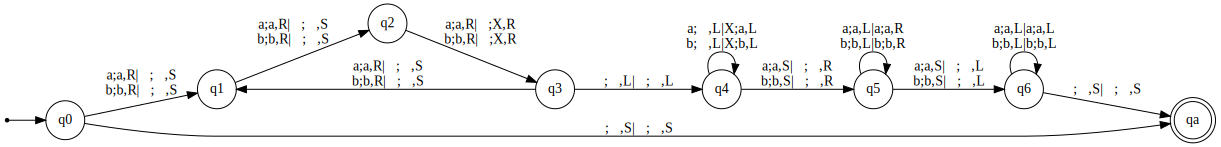

In [ ]:
#@title  $L_2 = \{ww^{R}w \mid w\in\{a,b\}\}$

Q = {'q0','q1','q2','q3','q4','q5','q6','qa'}
Sigma = {'a','b'}
Gamma = {'a','b','X','*'}
q0 = 'q0'
blank='*' #=' '
F = {'qa'}
delta ={
         ('q0','*','*') : ('qa','*','*','S','S'),
         ('q0','a','*') : ('q1','a','*','R','S'),
         ('q0','b','*') : ('q1','b','*','R','S'),
         ('q1','a','*') : ('q2','a','*','R','S'),
         ('q1','b','*') : ('q2','b','*','R','S'),
         ('q2','a','*') : ('q3','a','X','R','R'),
         ('q2','b','*') : ('q3','b','X','R','R'),
         ('q3','a','*') : ('q1','a','*','R','S'),
         ('q3','b','*') : ('q1','b','*','R','S'),
         ('q3','*','*') : ('q4','*','*','L','L'),
         ('q4','a','X') : ('q4','*','a','L','L'),
         ('q4','b','X') : ('q4','*','b','L','L'),
         ('q4','a','*') : ('q5','a','*','S','R'),
         ('q4','b','*') : ('q5','b','*','S','R'),
         ('q5','a','a') : ('q5','a','a','L','R'),
         ('q5','b','b') : ('q5','b','b','L','R'),
         ('q5','a','*') : ('q6','a','*','S','L'),
         ('q5','b','*') : ('q6','b','*','S','L'),
         ('q6','a','a') : ('q6','a','a','L','L'),
         ('q6','b','b') : ('q6','b','b','L','L'),
         ('q6','*','*') : ('qa','*','*','S','S'),
         ('q6','*','*') : ('qa','*','*','S','S')
         }

M_MF_L2 = MTMF(Q,Sigma,Gamma,delta,q0,blank,F)
M_MF_L2.visualizar()


In [ ]:
#@title Fazendo os testes
from itertools import product

# Função para verificar se a string está no formato ww^Rw
def check_pattern(s):
    """Verifica se a string s está no padrão ww^Rw, onde w^R é o reverso de w."""
    if not s:
        return True  # String vazia é válida (w = "")

    # Verifica se o comprimento da string é divisível por 3
    if len(s) % 3 != 0:
        return False

    # Divide a string em três partes iguais
    n = len(s) // 3
    w = s[:n]  # Primeira parte: w
    wR = s[n:2*n]  # Segunda parte: w^R (reverso de w)
    w2 = s[2*n:]  # Terceira parte: w novamente

    # Verifica se a segunda parte é o reverso da primeira e se a terceira parte é igual à primeira
    return (w == w2) and (w == wR[::-1])

# Variável para armazenar os pares 'w' : X
casos_testes = {}

# Gerar todas as strings de até 6 caracteres no alfabeto {a, b}
alfabeto = ['a', 'b']

# Incluindo a string vazia
casos_testes[""] = check_pattern("")  # String vazia é válida

# Gerar strings de comprimento 1 a 6
for length in range(1, 7):
    for w in product(alfabeto, repeat=length):
        string = ''.join(w)
        casos_testes[string] = check_pattern(string)

# Exibir os resultados
M_MF_L2.display_resultados(casos_testes)



Acertou 100.00% (127 de 127)


,Palavra,Esperado,Resultado
0,,True,True
1,a,False,False
2,b,False,False
3,aa,False,False
4,ab,False,False
...,...,...,...
122,bbbabb,False,False
123,bbbbaa,False,False
124,bbbbab,False,False
125,bbbbba,False,False


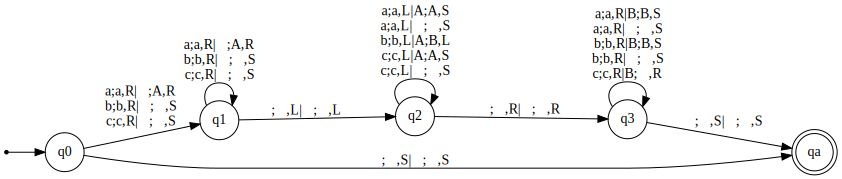

In [ ]:
#@title $L_3 = \{w \in \{a, b, c\}^* \mid n_{a}(w)=n_{b}(w)=n_{c}(w)\}$.

Q = {'q0','q1','q2','q3','qa'}
Sigma = {'a','b','c'}
Gamma = {'a','b','c','A','B','*'}
q0 = 'q0'
blank='*' #=' '
F = {'qa'}
delta ={
         ('q0','*','*') : ('qa','*','*','S','S'),
         ('q0','a','*') : ('q1','a','A','R','R'),
         ('q0','b','*') : ('q1','b','*','R','S'),
         ('q0','c','*') : ('q1','c','*','R','S'),
         ('q1','a','*') : ('q1','a','A','R','R'),
         ('q1','b','*') : ('q1','b','*','R','S'),
         ('q1','c','*') : ('q1','c','*','R','S'),
         ('q1','*','*') : ('q2','*','*','L','L'),
         ('q2','a','A') : ('q2','a','A','L','S'),
         ('q2','a','*') : ('q2','a','*','L','S'),
         ('q2','b','A') : ('q2','b','B','L','L'),
         ('q2','c','A') : ('q2','c','A','L','S'),
         ('q2','c','*') : ('q2','c','*','L','S'),
         ('q2','*','*') : ('q3','*','*','R','R'),
         ('q3','a','B') : ('q3','a','B','R','S'),
         ('q3','a','*') : ('q3','a','*','R','S'),
         ('q3','b','B') : ('q3','b','B','R','S'),
         ('q3','b','*') : ('q3','b','*','R','S'),
         ('q3','c','B') : ('q3','c','*','R','R'),
         ('q3','*','*') : ('qa','*','*','S','S'),
         }

M_MF_L3 = MTMF(Q,Sigma,Gamma,delta,q0,blank,F)
M_MF_L3.visualizar()

In [ ]:
#@title Fazendo o teste
from itertools import product

# Função para verificar se a string está no formato onde n_a(w) = n_b(w) = n_c(w)
def check_pattern(s):
    """Verifica se a string s tem o mesmo número de a's, b's e c's."""
    # Conta o número de ocorrências de a, b e c na string
    count_a = s.count('a')
    count_b = s.count('b')
    count_c = s.count('c')

    # Verifica se o número de a's, b's e c's é igual
    return count_a == count_b == count_c

# Variável para armazenar os pares 'w' : X
casos_testes = {}

# Gerar todas as strings de até 6 caracteres no alfabeto {a, b, c}
alfabeto = ['a', 'b', 'c']

# Incluindo a string vazia
casos_testes[""] = check_pattern("")  # String vazia é válida (0 a's, 0 b's, 0 c's)

# Gerar strings de comprimento 1 a 6
for length in range(1, 7):
    for w in product(alfabeto, repeat=length):
        string = ''.join(w)
        casos_testes[string] = check_pattern(string)

# Exibir os resultados
M_MF_L3.display_resultados(casos_testes)


Acertou 100.00% (1093 de 1093)


,Palavra,Esperado,Resultado
0,,True,True
1,a,False,False
2,b,False,False
3,c,False,False
4,aa,False,False
...,...,...,...
1088,ccccbb,False,False
1089,ccccbc,False,False
1090,ccccca,False,False
1091,cccccb,False,False


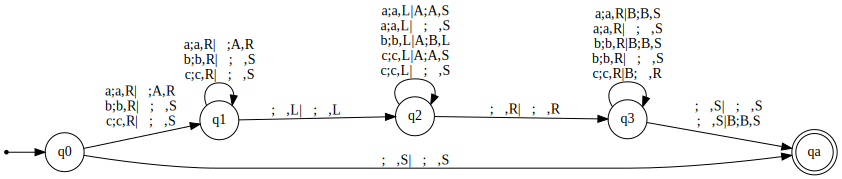

In [ ]:
#@title $L_4\{w \in \{a, b, c\}^* \mid n_{a}(w)=n_{b}(w)\geq n_{c}(w)\}$.

Q = {'q0','q1','q2','q3','qa'}
Sigma = {'a','b','c'}
Gamma = {'a','b','c','A','B','*'}
q0 = 'q0'
blank='*' #=' '
F = {'qa'}
delta ={
         ('q0','*','*') : ('qa','*','*','S','S'),
         ('q0','a','*') : ('q1','a','A','R','R'),
         ('q0','b','*') : ('q1','b','*','R','S'),
         ('q0','c','*') : ('q1','c','*','R','S'),
         ('q1','a','*') : ('q1','a','A','R','R'),
         ('q1','b','*') : ('q1','b','*','R','S'),
         ('q1','c','*') : ('q1','c','*','R','S'),
         ('q1','*','*') : ('q2','*','*','L','L'),
         ('q2','a','A') : ('q2','a','A','L','S'),
         ('q2','a','*') : ('q2','a','*','L','S'),
         ('q2','b','A') : ('q2','b','B','L','L'),
         ('q2','c','A') : ('q2','c','A','L','S'),
         ('q2','c','*') : ('q2','c','*','L','S'),
         ('q2','*','*') : ('q3','*','*','R','R'),
         ('q3','a','B') : ('q3','a','B','R','S'),
         ('q3','a','*') : ('q3','a','*','R','S'),
         ('q3','b','B') : ('q3','b','B','R','S'),
         ('q3','b','*') : ('q3','b','*','R','S'),
         ('q3','c','B') : ('q3','c','*','R','R'),
         ('q3','*','*') : ('qa','*','*','S','S'),
         ('q3','*','B') : ('qa','*','B','S','S')
         }

M_MF_L4 = MTMF(Q,Sigma,Gamma,delta,q0,blank,F)
M_MF_L4.visualizar()

In [ ]:
#@title Fazendo teste
from itertools import product

# Função para verificar se a string está no formato onde n_a(w) = n_b(w) = n_c(w)
def check_pattern(s):
    """Verifica se a string s tem o mesmo número de a's, b's e c's."""
    # Conta o número de ocorrências de a, b e c na string
    count_a = s.count('a')
    count_b = s.count('b')
    count_c = s.count('c')

    # Verifica se o número de a's, b's e c's é igual
    return count_a == count_b >= count_c

# Variável para armazenar os pares 'w' : X
casos_testes = {}

# Gerar todas as strings de até 6 caracteres no alfabeto {a, b, c}
alfabeto = ['a', 'b', 'c']

# Incluindo a string vazia
casos_testes[""] = check_pattern("")  # String vazia é válida (0 a's, 0 b's, 0 c's)

# Gerar strings de comprimento 1 a 6
for length in range(1, 7):
    for w in product(alfabeto, repeat=length):
        string = ''.join(w)
        casos_testes[string] = check_pattern(string)

# Exibir os resultados
M_MF_L4.display_resultados(casos_testes)


Acertou 100.00% (1093 de 1093)


,Palavra,Esperado,Resultado
0,,True,True
1,a,False,False
2,b,False,False
3,c,False,False
4,aa,False,False
...,...,...,...
1088,ccccbb,False,False
1089,ccccbc,False,False
1090,ccccca,False,False
1091,cccccb,False,False


## 2) Considere a sua Máquina de Turing de duas fitas que reconhece a linguagem
$L=\{ww^{R}w:w\in\{a,b\}\}$. Vamos agora construir uma Máquina de Turing que além de ter duas fitas é também não determinística. Avalie de que maneira o não-determinismo pode permitir sua Máquina de Turing com duas fitas reconhecer a palavra em menos passos.


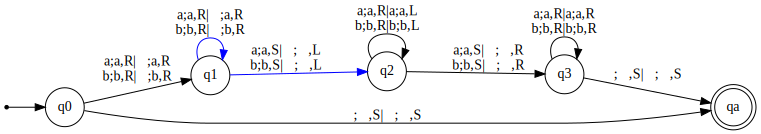

In [ ]:
#@title  $L_5 = \{ww^{R}w \mid w\in\{a,b\}\}$

Q = {'q0','q1','q2','q3','qa'}
Sigma = {'a','b'}
Gamma = {'a','b','X','*'}
q0 = 'q0'
blank='*' #=' '
F = {'qa'}
delta ={
         ('q0','*','*') : {('qa','*','*','S','S')},
         ('q0','a','*') : {('q1','a','a','R','R')},
         ('q0','b','*') : {('q1','b','b','R','R')},
         ('q1','a','*') : {('q1','a','a','R','R'),('q2','a','*','S','L')},
         ('q1','b','*') : {('q1','b','b','R','R'),('q2','b','*','S','L')},
         ('q2','a','a') : {('q2','a','a','R','L')},
         ('q2','b','b') : {('q2','b','b','R','L')},
         ('q2','a','*') : {('q3','a','*','S','R')},
         ('q2','b','*') : {('q3','b','*','S','R')},
         ('q3','a','a') : {('q3','a','a','R','R')},
         ('q3','b','b') : {('q3','b','b','R','R')},
         ('q3','*','*') : {('qa','*','*','S','S')}
         }

M_MNDF_L5 = MTNDMF(Q,Sigma,Gamma,delta,q0,blank,F)
M_MNDF_L5.visualizar(highlightNonDeterministic=True)


In [ ]:
#@title Fazendo os testes
from itertools import product

# Função para verificar se a string está no formato ww^Rw
def check_pattern(s):
    """Verifica se a string s está no padrão ww^Rw, onde w^R é o reverso de w."""
    if not s:
        return True  # String vazia é válida (w = "")

    # Verifica se o comprimento da string é divisível por 3
    if len(s) % 3 != 0:
        return False

    # Divide a string em três partes iguais
    n = len(s) // 3
    w = s[:n]  # Primeira parte: w
    wR = s[n:2*n]  # Segunda parte: w^R (reverso de w)
    w2 = s[2*n:]  # Terceira parte: w novamente

    # Verifica se a segunda parte é o reverso da primeira e se a terceira parte é igual à primeira
    return (w == w2) and (w == wR[::-1])

# Variável para armazenar os pares 'w' : X
casos_testes = {}

# Gerar todas as strings de até 6 caracteres no alfabeto {a, b}
alfabeto = ['a', 'b']

# Incluindo a string vazia
casos_testes[""] = check_pattern("")  # String vazia é válida

# Gerar strings de comprimento 1 a 6
for length in range(1, 7):
    for w in product(alfabeto, repeat=length):
        string = ''.join(w)
        casos_testes[string] = check_pattern(string)

# Exibir os resultados
M_MNDF_L5.display_resultados(casos_testes)

Acertou 100.00% (127 de 127)


,Palavra,Esperado,Resultado
0,,True,True
1,a,False,False
2,b,False,False
3,aa,False,False
4,ab,False,False
...,...,...,...
122,bbbabb,False,False
123,bbbbaa,False,False
124,bbbbab,False,False
125,bbbbba,False,False


## 3) Construa uma Máquina de Turing não determinística para cada uma das linguagens abaixo. Suponha que a fita seja infinita em ambos os lados.

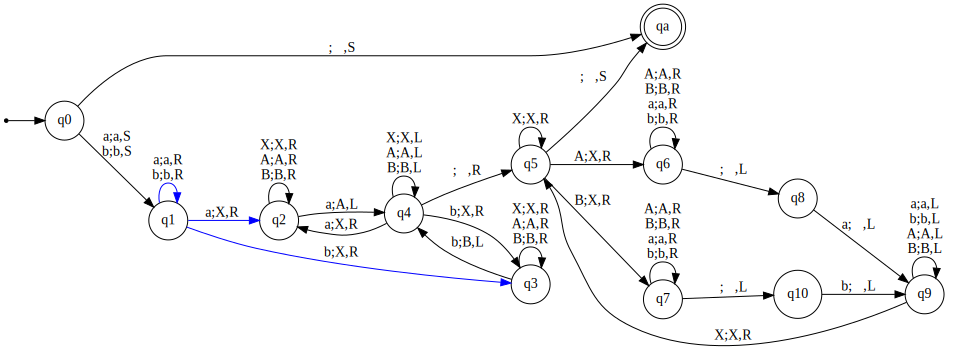

In [ ]:
#@title  $L_6 = \{ww^{R}w \mid w\in\{a,b\}\}$

Q = {'q0','q1','q2','q3','q4','q5','q6','q7','q8','q9','q10','qa'}
Sigma = {'a','b'}
Gamma = {'a','b','A','B','X','*'}
q0 = 'q0'
blank='*' #=' '
F = {'qa'}
delta ={
         ('q0','*') : {('qa','*','S')},
         ('q0','a') : {('q1','a','S')},
         ('q0','b') : {('q1','b','S')},
         ('q1','a') : {('q1','a','R'), ('q2','X','R')},
         ('q1','b') : {('q1','b','R'), ('q3','X','R')},
         ('q2','X') : {('q2','X','R')},
         ('q2','A') : {('q2','A','R')},
         ('q2','B') : {('q2','B','R')},
         ('q2','a') : {('q4','A','L')},
         ('q3','X') : {('q3','X','R')},
         ('q3','A') : {('q3','A','R')},
         ('q3','B') : {('q3','B','R')},
         ('q3','b') : {('q4','B','L')},
         ('q4','X') : {('q4','X','L')},
         ('q4','A') : {('q4','A','L')},
         ('q4','B') : {('q4','B','L')},
         ('q4','a') : {('q2','X','R')},
         ('q4','b') : {('q3','X','R')},
         ('q4','*') : {('q5','*','R')},
         ('q5','X') : {('q5','X','R')},
         ('q5','A') : {('q6','X','R')},
         ('q5','B') : {('q7','X','R')},
         ('q5','*') : {('qa','*','S')},
         ('q6','A') : {('q6','A','R')},
         ('q6','B') : {('q6','B','R')},
         ('q6','a') : {('q6','a','R')},
         ('q6','b') : {('q6','b','R')},
         ('q6','*') : {('q8','*','L')},
         ('q8','a') : {('q9','*','L')},
         ('q7','A') : {('q7','A','R')},
         ('q7','B') : {('q7','B','R')},
         ('q7','a') : {('q7','a','R')},
         ('q7','b') : {('q7','b','R')},
         ('q7','*') : {('q10','*','L')},
         ('q9','a') : {('q9','a','L')},
         ('q9','b') : {('q9','b','L')},
         ('q9','A') : {('q9','A','L')},
         ('q9','B') : {('q9','B','L')},
         ('q9','X') : {('q5','X','R')},
         ('q10','b') : {('q9','*','L')}
         }

M_ND_L6 = MTND(Q,Sigma,Gamma,delta,q0,blank,F)
M_ND_L6.visualizar(highlightNonDeterministic=True)


In [ ]:
#@title Fazendo os testes
from itertools import product

# Função para verificar se a string está no formato ww^Rw
def check_pattern(s):
    """Verifica se a string s está no padrão ww^Rw, onde w^R é o reverso de w."""
    if not s:
        return True  # String vazia é válida (w = "")

    # Verifica se o comprimento da string é divisível por 3
    if len(s) % 3 != 0:
        return False

    # Divide a string em três partes iguais
    n = len(s) // 3
    w = s[:n]  # Primeira parte: w
    wR = s[n:2*n]  # Segunda parte: w^R (reverso de w)
    w2 = s[2*n:]  # Terceira parte: w novamente

    # Verifica se a segunda parte é o reverso da primeira e se a terceira parte é igual à primeira
    return (w == w2) and (w == wR[::-1])

# Variável para armazenar os pares 'w' : X
casos_testes = {}

# Gerar todas as strings de até 6 caracteres no alfabeto {a, b}
alfabeto = ['a', 'b']

# Incluindo a string vazia
casos_testes[""] = check_pattern("")  # String vazia é válida

# Gerar strings de comprimento 1 a 6
for length in range(1, 7):
    for w in product(alfabeto, repeat=length):
        string = ''.join(w)
        casos_testes[string] = check_pattern(string)

# Exibir os resultados
M_ND_L6.display_resultados(casos_testes)

Acertou 100.00% (127 de 127)


,Palavra,Esperado,Resultado
0,,True,True
1,a,False,False
2,b,False,False
3,aa,False,False
4,ab,False,False
...,...,...,...
122,bbbabb,False,False
123,bbbbaa,False,False
124,bbbbab,False,False
125,bbbbba,False,False


In [ ]:
#@title Fazendo o teste

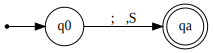

In [ ]:
#@title $L_7 = \{w \in \{a, b, c\}^* \mid n_{a}(w)=n_{b}(w)=n_{c}(w)\}$.

Q = {'q0','qa'}
Sigma = {'a','b','c'}
Gamma = {'a','b','c','A','B','*'}
q0 = 'q0'
blank='*' #=' '
F = {'qa'}
delta ={
         ('q0','*') : {('qa','*','S')}
         # Ainda faltam muiitas transições!!!
         # O não-determinismo não ajuda de maneira significativa neste problema. Aqui seguiria a versão determinística...
         }

M_MF_L7 = MTND(Q,Sigma,Gamma,delta,q0,blank,F)
M_MF_L7.visualizar()

In [ ]:
#@title Fazendo o teste

## Construa a MT $\mathit{Inserir}(\sigma)$, que altera o conteúdo da fita de $y\underline{z}$ para $y \underline{\sigma} z$, em que $y \in (\Sigma \cup \{\Delta \})^*$, $\sigma \in \Sigma \cup \{\Delta\}$ e $z \in \Sigma^*$. Você pode assumir que $\Sigma = \{a, b \}$.

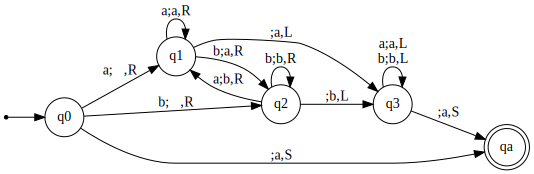

In [ ]:
#@title Vamos implementar a MT $\textit{Inserir}(a)$, que insere a letra $a$
Q = {'q0','q1','q2','q3','qa'}
Sigma = {'a','b'}
Gamma = {'a','b','*'}
q0 = 'q0'
blank='*' #=' '
F = {'qa'}
delta ={
         ('q0','*') : ('qa','a','S'),
         ('q0','a') : ('q1','*','R'),
         ('q0','b') : ('q2','*','R'),
         ('q1','a') : ('q1','a','R'),
         ('q1','b') : ('q2','a','R'),
         ('q1','*') : ('q3','a','L'),
         ('q2','a') : ('q1','b','R'),
         ('q2','b') : ('q2','b','R'),
         ('q2','*') : ('q3','b','L'),
         ('q3','a') : ('q3','a','L'),
         ('q3','b') : ('q3','b','L'),
         ('q3','*') : ('qa','a','S')
         }

M_L8 = MT(Q,Sigma,Gamma,delta,q0,blank,F)
M_L8.visualizar()

## 6) Desenhe uma Máquina de Turing (MT) que recebe como entrada uma string de 0's e 1's, interpreta-a como a representação binária de um número inteiro não negativo e deixa como saída a representação unária desse número (ou seja, uma string com essa quantidade de 1's).


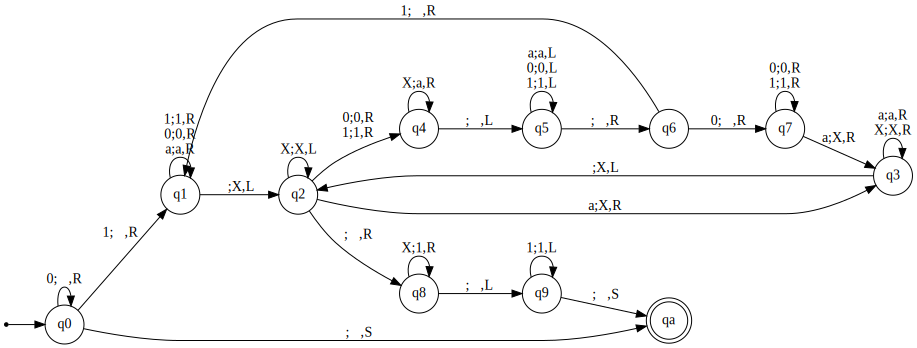

In [ ]:
#@title Máquina de Turing que converte binário em unário
Q = {'q0','q1','q2','q3','q4','q5','q6','q7','q8','q9','qa'}
Sigma = {'0','1'}
Gamma = {'0','1','*','a','X'}
q0 = 'q0'
blank='*' #=' '
F = {'qa'}
delta = {
    # Etapa 1: Substituir todos os '1's por '0*'
    ('q0', '*'): ('qa', '*', 'S'),  # Ignora '0's e move para a direita
    ('q0', '0'): ('q0', '*', 'R'),  # Substitui '1' por '0' e move para a direita
    ('q0', '1'): ('q1', '*', 'R'),  # Ignora '0's e move para a direita
    ('q1', '1'): ('q1', '1', 'R'),  # Substitui '1' por '0' e move para a direita
    ('q1', '0'): ('q1', '0', 'R'),  # Ignora '*' e move para a direita
    ('q1', 'a'): ('q1', 'a', 'R'),
    ('q1', '*'): ('q2', 'X', 'L'),
    ('q2', 'a'): ('q3', 'X', 'R'),
    ('q2', 'X'): ('q2', 'X', 'L'),
    ('q2', '0'): ('q4', '0', 'R'),
    ('q2', '1'): ('q4', '1', 'R'),
    ('q2', '*'): ('q8', '*', 'R'),
    ('q3', 'a'): ('q3', 'a', 'R'),
    ('q3', 'X'): ('q3', 'X', 'R'),
    ('q3', '*'): ('q2', 'X', 'L'),
    ('q4', 'X'): ('q4', 'a', 'R'),
    ('q4', '*'): ('q5', '*', 'L'),
    ('q5', 'a'): ('q5', 'a', 'L'),
    ('q5', '0'): ('q5', '0', 'L'),
    ('q5', '1'): ('q5', '1', 'L'),
    ('q5', '*'): ('q6', '*', 'R'),
    ('q6', '0'): ('q7', '*', 'R'),
    ('q6', '1'): ('q1', '*', 'R'),
    ('q7', '0'): ('q7', '0', 'R'),
    ('q7', '1'): ('q7', '1', 'R'),
    ('q7', 'a'): ('q3', 'X', 'R'),
    ('q8', 'X'): ('q8', '1', 'R'),
    ('q8', '*'): ('q9', '*', 'L'),
    ('q9', '1'): ('q9', '1', 'L'),
    ('q9', '*'): ('qa', '*', 'S')
}

M_L9 = MT(Q,Sigma,Gamma,delta,q0,blank,F)
M_L9.visualizar()



In [ ]:
M_L9.aceita("1101",show_steps=True)
#M_L9.simular("1111")

q01101
*q1101
*1q101
*10q11
*101q1*
*10q21X
*101q4X
*101aq4*
*101q5a*
*10q51a*
*1q501a*
*q5101a*
q5*101a*
*q6101a*
**q101a*
**0q11a*
**01q1a*
**01aq1*
**01q2aX
**01Xq3X
**01XXq3*
**01Xq2XX
**01q2XXX
**0q21XXX
**01q4XXX
**01aq4XX
**01aaq4X
**01aaaq4*
**01aaq5a*
**01aq5aa*
**01q5aaa*
**0q51aaa*
**q501aaa*
*q5*01aaa*
**q601aaa*
***q71aaa*
***1q7aaa*
***1Xq3aa*
***1Xaq3a*
***1Xaaq3*
***1Xaq2aX
***1XaXq3X
***1XaXXq3*
***1XaXq2XX
***1Xaq2XXX
***1Xq2aXXX
***1XXq3XXX
***1XXXq3XX
***1XXXXq3X
***1XXXXXq3*
***1XXXXq2XX
***1XXXq2XXX
***1XXq2XXXX
***1Xq2XXXXX
***1q2XXXXXX
***q21XXXXXX
***1q4XXXXXX
***1aq4XXXXX
***1aaq4XXXX
***1aaaq4XXX
***1aaaaq4XX
***1aaaaaq4X
***1aaaaaaq4*
***1aaaaaq5a*
***1aaaaq5aa*
***1aaaq5aaa*
***1aaq5aaaa*
***1aq5aaaaa*
***1q5aaaaaa*
***q51aaaaaa*
**q5*1aaaaaa*
***q61aaaaaa*
****q1aaaaaa*
****aq1aaaaa*
****aaq1aaaa*
****aaaq1aaa*
****aaaaq1aa*
****aaaaaq1a*
****aaaaaaq1*
****aaaaaq2aX
****aaaaaXq3X
****aaaaaXXq3*
****aaaaaXq2XX
****aaaaaq2XXX
****aaaaq2aXXX
****aaaaXq3XXX
**

True

## 7) Em sala de aula, já construímos uma MT que aceitava linguagem $\{ww \mid w \in \{a, b\}^*\}$. Para tal, usamos as letras $A$ e $B$ além das letras $a$, $b$ e $\Delta$. Vamos agora deixar a tarefa um pouco mais desafiadora: você vai construir uma MT que aceita essa linguagem, mas com alfabeto de fita $\{a, b, \Delta\}$, ou seja, agora você não vai poder usar $A$ e $B$ para auxiliar nesse processo.

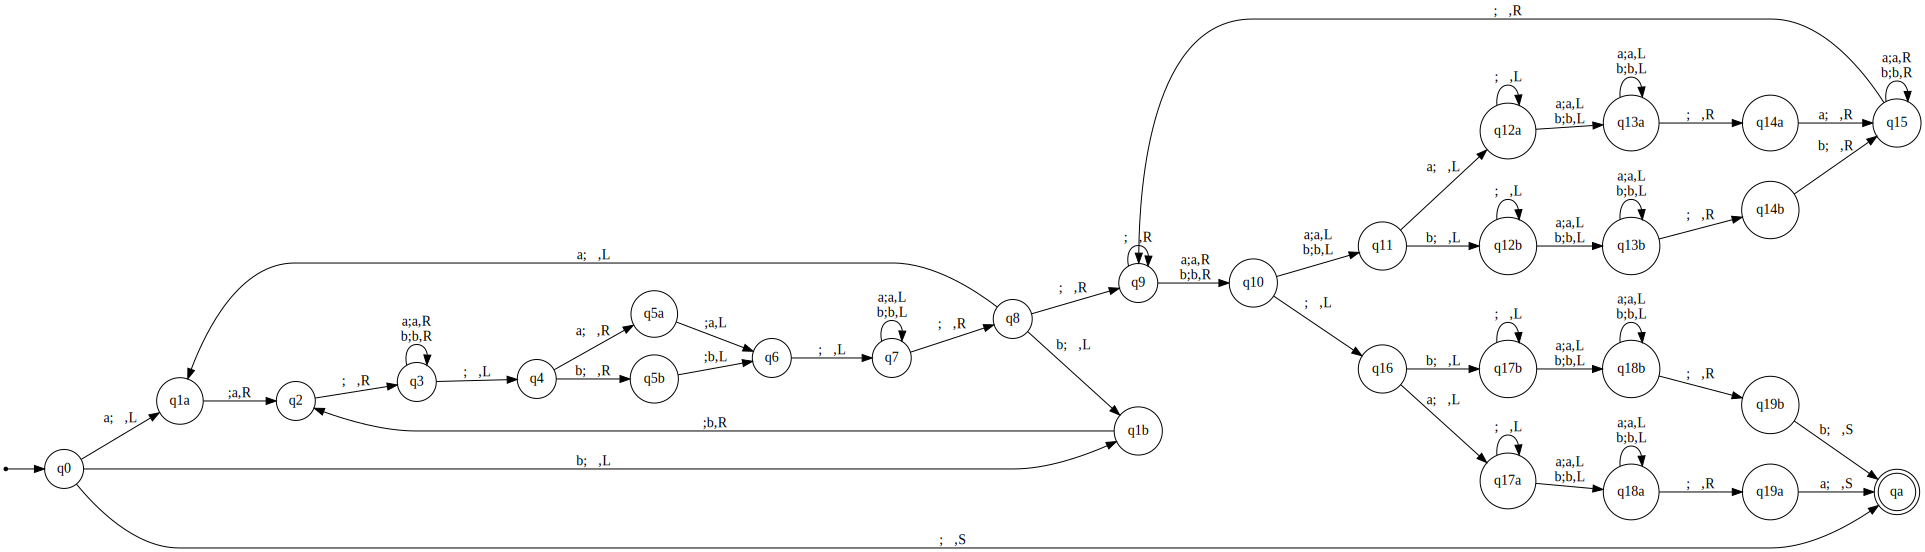

In [ ]:
#@title $L_{10} = \{ ww \mid w \in \{a, b\}^*\}

Q = {'q0','q1a','q1b','q2','q3','q4','q5a','q5b','q6','q7','q8','q9','q10','q11','q12a','q12b','q13a','q13b','q14a','q14b','q15','q16','q17a','q17b','q18a','q18b','q19a','q19b','qa'}
Sigma = {'a','b'}
Gamma = {'a','b','*'}
q0 = 'q0'
blank='*' #=' '
F = {'qa'}
delta ={
         ('q0','*') : ('qa','*','S'),
         ('q0','a') : ('q1a','*','L'),
         ('q0','b') : ('q1b','*','L'),
         ('q1a','*') : ('q2','a','R'),
         ('q1b','*') : ('q2','b','R'),
         ('q2','*') : ('q3','*','R'),
         ('q3','a') : ('q3','a','R'),
         ('q3','b') : ('q3','b','R'),
         ('q3','*') : ('q4','*','L'),
         ('q4','a') : ('q5a','*','R'),
         ('q4','b') : ('q5b','*','R'),
         ('q5a','*') : ('q6','a','L'),
         ('q5b','*') : ('q6','b','L'),
         ('q6','*') : ('q7','*','L'),
         ('q7','a') : ('q7','a','L'),
         ('q7','b') : ('q7','b','L'),
         ('q7','*') : ('q8','*','R'),
         ('q8','a') : ('q1a','*','L'),
         ('q8','b') : ('q1b','*','L'),
         ('q8','*') : ('q9','*','R'),
         ('q9','a') : ('q10','a','R'),
         ('q9','b') : ('q10','b','R'),
         ('q9','*') : ('q9','*','R'),
         ('q10','a') : ('q11','a','L'),
         ('q10','b') : ('q11','b','L'),
         ('q10','*') : ('q16','*','L'),
         ('q11','a') : ('q12a','*','L'),
         ('q11','b') : ('q12b','*','L'),
         ('q12a','*') : ('q12a','*','L'),
         ('q12b','*') : ('q12b','*','L'),
         ('q12a','a') : ('q13a','a','L'),
         ('q12a','b') : ('q13a','b','L'),
         ('q12b','a') : ('q13b','a','L'),
         ('q12b','b') : ('q13b','b','L'),
         ('q13a','a') : ('q13a','a','L'),
         ('q13a','b') : ('q13a','b','L'),
         ('q13b','a') : ('q13b','a','L'),
         ('q13b','b') : ('q13b','b','L'),
         ('q13a','*') : ('q14a','*','R'),
         ('q13b','*') : ('q14b','*','R'),
         ('q14a','a') : ('q15','*','R'),
         ('q14b','b') : ('q15','*','R'),
         ('q15','a') : ('q15','a','R'),
         ('q15','b') : ('q15','b','R'),
         ('q15','*') : ('q9','*','R'),
         ('q16','a') : ('q17a','*','L'),
         ('q16','b') : ('q17b','*','L'),
         ('q17a','*') : ('q17a','*','L'),
         ('q17b','*') : ('q17b','*','L'),
         ('q17a','a') : ('q18a','a','L'),
         ('q17a','b') : ('q18a','b','L'),
         ('q17b','a') : ('q18b','a','L'),
         ('q17b','b') : ('q18b','b','L'),
         ('q18a','a') : ('q18a','a','L'),
         ('q18a','b') : ('q18a','b','L'),
         ('q18b','a') : ('q18b','a','L'),
         ('q18b','b') : ('q18b','b','L'),
         ('q18a','*') : ('q19a','*','R'),
         ('q18b','*') : ('q19b','*','R'),
         ('q19a','a') : ('qa','*','S'),
         ('q19b','b') : ('qa','*','S')
         }

M_L10 = MT(Q,Sigma,Gamma,delta,q0,blank,F)
M_L10.visualizar()

In [ ]:
#@title Fazendo testes
from itertools import product

# Função para verificar se a string está no formato ww
def check_pattern(s):
    """Verifica se a string s está no padrão ww, onde w é uma string sobre {a, b}."""
    if not s:
        return True  # String vazia é válida (w = "")

    # Verifica se o comprimento da string é par
    if len(s) % 2 != 0:
        return False

    # Divide a string em duas partes iguais
    n = len(s) // 2
    w1 = s[:n]  # Primeira parte: w
    w2 = s[n:]  # Segunda parte: w novamente

    # Verifica se as duas partes são iguais
    return w1 == w2

# Variável para armazenar os pares 'w' : X
casos_testes = {}

# Gerar todas as strings de até 6 caracteres no alfabeto {a, b}
alfabeto = ['a', 'b']

# Incluindo a string vazia
casos_testes[""] = check_pattern("")  # String vazia é válida

# Gerar strings de comprimento 1 a 6
for length in range(1, 7):
    for w in product(alfabeto, repeat=length):
        string = ''.join(w)
        casos_testes[string] = check_pattern(string)

# Exibir os resultados
M_L10.display_resultados(casos_testes)

Acertou 100.00% (127 de 127)


,Palavra,Esperado,Resultado
0,,True,True
1,a,False,False
2,b,False,False
3,aa,True,True
4,ab,False,False
...,...,...,...
122,bbbabb,False,False
123,bbbbaa,False,False
124,bbbbab,False,False
125,bbbbba,False,False


In [ ]:
M_L10.aceita("abbaabba",show_steps=True)

q0abbaabba
q1a**bbaabba
aq2*bbaabba
a*q3bbaabba
a*bq3baabba
a*bbq3aabba
a*bbaq3abba
a*bbaaq3bba
a*bbaabq3ba
a*bbaabbq3a
a*bbaabbaq3*
a*bbaabbq4a*
a*bbaabb*q5a*
a*bbaabbq6*a
a*bbaabq7b*a
a*bbaaq7bb*a
a*bbaq7abb*a
a*bbq7aabb*a
a*bq7baabb*a
a*q7bbaabb*a
aq7*bbaabb*a
a*q8bbaabb*a
aq1b**baabb*a
abq2*baabb*a
ab*q3baabb*a
ab*bq3aabb*a
ab*baq3abb*a
ab*baaq3bb*a
ab*baabq3b*a
ab*baabbq3*a
ab*baabq4b*a
ab*baab*q5b*a
ab*baabq6*ba
ab*baaq7b*ba
ab*baq7ab*ba
ab*bq7aab*ba
ab*q7baab*ba
abq7*baab*ba
ab*q8baab*ba
abq1b**aab*ba
abbq2*aab*ba
abb*q3aab*ba
abb*aq3ab*ba
abb*aaq3b*ba
abb*aabq3*ba
abb*aaq4b*ba
abb*aa*q5b*ba
abb*aaq6*bba
abb*aq7a*bba
abb*q7aa*bba
abbq7*aa*bba
abb*q8aa*bba
abbq1a**a*bba
abbaq2*a*bba
abba*q3a*bba
abba*aq3*bba
abba*q4a*bba
abba**q5a*bba
abba*q6*abba
abbaq7**abba
abba*q8*abba
abba**q9abba
abba**aq10bba
abba**q11abba
abba*q12a**bba
abbaq12a***bba
abbq12aa***bba
abq13aba***bba
aq13abba***bba
q13aabba***bba
q13a*abba***bba
*q14aabba***bba
**q15bba***bba
**bq15ba***bba
**bbq15a***bba
**

True